In [286]:
import requests
import time
import pandas as pd
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
import ast 

In [3]:
BASE_URL = 'https://api.mycar.kz'

GET_CARS_URL = '/publications/api/publications'
GET_CAR_INFO_URL = '/cars/api/publications/'

headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
}

params_template = {
    'offset': 0,
    'coupe_id_in': 1,
    'max_price': 15000000,
    'min_price': 5000000,
    'max_year_manufactured': 2023,
    'min_year_manufactured': 2013,
    'ordering': '-modified',
    'limit': 100
}

In [4]:
def get_all_cars():
    all_items = []
    offset = 0

    while True:
        params = params_template.copy()
        params['offset'] = offset

        try:
            response = requests.get(f'{BASE_URL}{GET_CARS_URL}', headers=headers, params=params)
            data = response.json()

            results = data.get('results', [])
            actual_count = data.get('actual_count', 0)

            all_items.extend(results)

            if offset >= actual_count:
                print(f"first id: {all_items[0]['id']}, last id: {all_items[-1]['id']}")
                break

            offset += 100
            time.sleep(2)
        except Exception as error:
            print('Error:', str(error))
            raise error

    return all_items

In [5]:
if __name__ == '__main__':
    try:
        ALL_ITEMS = get_all_cars()
        print(len(ALL_ITEMS))
        
    except Exception as error:
        print('Failed to fetch items:', str(error))

first id: 1067883, last id: 88950
2031


In [64]:
def get_car_info(id): 
    try:
        response = requests.get(f'{BASE_URL}{GET_CAR_INFO_URL}{id}', headers=headers)
        response.raise_for_status()  # Raise HTTPError for bad responses
        return response.json()
    except requests.exceptions.RequestException as error:
        print(f'Error fetching car info for ID {id}: {error}')
        return {}

In [ ]:
CARS_INFO = []

for car_data in ALL_ITEMS:
    car_id = car_data.get('id') 
    if car_id:
        try:
            car_info = get_car_info(car_id)
            CARS_INFO.append(car_info)
            print(len(CARS_INFO))
        except Exception as error:
            print(f'Error processing car with ID {car_id}: {error}')
        time.sleep(4)

In [264]:
with open('CARS_INFO.json', 'r') as file:
    CARS_INFO = json.load(file)



df = pd.DataFrame(CARS_INFO)
df.head(1)
# print(len(df))
# df.describe()

,id,modified,car_type,car_mark,car_model,car_modification,car_generation,car_serie,car_equipment,price,...,is_postponement_available,publication_url,published_datetime,panorama,car_characteristics,is_tech_report_available,price_analytics,external_url,is_black_friday_available,is_mycredit_enabled
0,1058491,2023-12-17T20:39:07.043739+06:00,1,"{'id': 76, 'name': 'Hyundai', 'name_ru': 'Хёнд...","{'id': 791, 'name': 'Elantra', 'name_ru': 'Эла...","{'id': 91350, 'name': '1.5 CVT (115 л.с.)', 'i...","{'id': 9562, 'name': '7 поколение [рестайлинг]...","{'id': 14754, 'name': 'Седан', 'car_generation...",None,10800000.00,...,False,https://mycar.kz/announcement/1058491,2023-12-12T07:26:35.092165+06:00,None,"[{'name': 'Тип кузова', 'latin_name': '', 'uni...",False,{'segment_ranges': [{'range_min': '7903000.00'...,,False,True


In [206]:
#Cleaning
df = df.drop_duplicates(subset=['id', 'user_id'], keep='first')

df['modified'] = pd.to_datetime(df['modified'])

df['price'] = pd.to_numeric(df['price'])

df['median_price'] = pd.to_numeric(df['price_analytics'].apply(lambda x: x.get('median_price', 0)), errors='coerce')
# df['credit_amount'] = pd.to_numeric(df['credit_amount'])

print(len(df))

1870


In [145]:
#Sorting
df = df.sort_values(by='price')
df.head(5)

,id,modified,car_type,car_mark,car_model,car_modification,car_generation,car_serie,car_equipment,price,...,is_postponement_available,publication_url,published_datetime,panorama,car_characteristics,is_tech_report_available,price_analytics,external_url,is_black_friday_available,is_mycredit_enabled
1395,1109464,2023-12-12T21:00:01.437039+06:00,1,"{'id': 76, 'name': 'Hyundai', 'name_ru': 'Хёнд...","{'id': 816, 'name': 'Sonata', 'name_ru': 'Сона...","{'id': 50443, 'name': '2.4 AT (171 л.с.)', 'is...","{'id': 6220, 'name': '7 поколение [рестайлинг]...","{'id': 9974, 'name': 'Седан', 'car_generation_...",None,10000000.00,...,False,https://mycar.kz/announcement/1109464,2023-12-12T21:00:01.433003+06:00,None,"[{'name': 'Привод', 'latin_name': '', 'unit': ...",False,{'segment_ranges': [{'range_min': '7140000.00'...,,False,True
1325,1110571,2023-12-14T03:03:52.944869+06:00,1,"{'id': 89, 'name': 'Kia', 'name_ru': 'Киа', 'l...","{'id': 2980, 'name': 'K5', 'name_ru': 'К5', 'c...","{'id': 66146, 'name': '2.0 AT (156 л.с.)', 'is...","{'id': 6898, 'name': '2 поколение', 'year_begi...","{'id': 11004, 'name': 'Седан', 'car_generation...",None,10000000.00,...,False,https://mycar.kz/announcement/1110571,2023-12-14T03:03:52.941640+06:00,None,"[{'name': 'Привод', 'latin_name': '', 'unit': ...",False,{'segment_ranges': [{'range_min': '5495000.00'...,,False,True
1596,1101516,2023-12-08T15:53:02.456834+06:00,1,"{'id': 89, 'name': 'Kia', 'name_ru': 'Киа', 'l...","{'id': 2980, 'name': 'K5', 'name_ru': 'К5', 'c...","{'id': 66146, 'name': '2.0 AT (156 л.с.)', 'is...","{'id': 6898, 'name': '2 поколение', 'year_begi...","{'id': 11004, 'name': 'Седан', 'car_generation...",None,10000000.00,...,False,https://mycar.kz/announcement/1101516,2023-12-08T15:53:02.452388+06:00,None,"[{'name': 'Привод', 'latin_name': '', 'unit': ...",False,{'segment_ranges': [{'range_min': '7420000.00'...,,False,True
1020,1113340,2023-12-15T04:05:16.053933+06:00,1,"{'id': 34, 'name': 'Chevrolet', 'name_ru': 'Ше...","{'id': 274, 'name': 'Malibu', 'name_ru': 'Мали...","{'id': 63364, 'name': '2.0 AT (250 л.с.)', 'is...","{'id': 6710, 'name': '9 поколение [рестайлинг]...","{'id': 10906, 'name': 'Седан', 'car_generation...",None,10000000.00,...,False,https://mycar.kz/announcement/1113340,2023-12-15T04:05:16.051169+06:00,None,"[{'name': 'Привод', 'latin_name': '', 'unit': ...",False,{'segment_ranges': [{'range_min': '7000000.00'...,,False,True
157,994127,2023-12-07T02:18:37.260385+06:00,1,"{'id': 76, 'name': 'Hyundai', 'name_ru': 'Хёнд...","{'id': 791, 'name': 'Elantra', 'name_ru': 'Эла...","{'id': 84924, 'name': '1.6 AT (200 л.с.)', 'is...","{'id': 8389, 'name': '7 поколение', 'year_begi...","{'id': 13159, 'name': 'Седан', 'car_generation...",None,10000000.00,...,False,https://mycar.kz/announcement/994127,2023-12-07T02:18:37.257598+06:00,None,"[{'name': 'Тип КПП', 'latin_name': '', 'unit':...",False,{'segment_ranges': [{'range_min': '7833000.00'...,,False,True


In [302]:
#Feature Engineering and Data Aggregation and Data Wrangling
df['car_brand'] = df['car_mark'].apply(lambda x: x['name'] if x and 'name' in x else None)
top_brands = df.groupby('car_brand')['views_count'].sum().nlargest(5)


df['coupe_type'] = df['car_modification'].apply(lambda x: x.get('coupe_type', None))

numerical_columns = ['price', 'car_details.mileage', 'car_generation.year_begin']

df['car_mileage'] = df['car_details'].apply(lambda x: x['mileage'] if x and 'mileage' in x else None)

df['car_generation_year'] = df['car_generation'].apply(lambda x: x['year_begin'] if x and 'year_begin' in x else None)

df['engine_power'] = df['car_modification'].apply(lambda x: x['engine_power'] if x and 'engine_power' in x else None)

df['car_color_name'] = df['car_details'].apply(lambda x: x['car_color']['name'] if x and 'car_color' in x else None)

colors_count = df['car_details'].apply(lambda x: x['car_color']['name'] if x and 'car_color' in x and 'name' in x['car_color'] else None).value_counts()




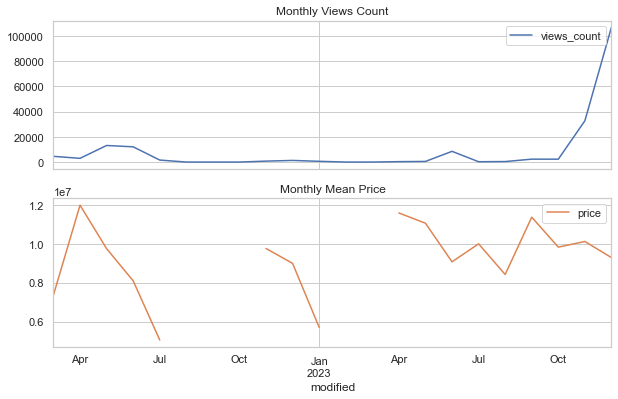

In [241]:
#Time graph of changes in the number of views and prices for used cars
sns.set(style="whitegrid")
df.reset_index(inplace=True)
df.set_index('modified', inplace=True)
df_resampled = df.resample('M').agg({'views_count': 'sum', 'price': 'mean'})

ax = df_resampled.plot(subplots=True, figsize=(10, 6))
ax[0].set_title('Monthly Views Count')
ax[1].set_title('Monthly Mean Price')
plt.savefig('Views_Prices.png')

plt.show()

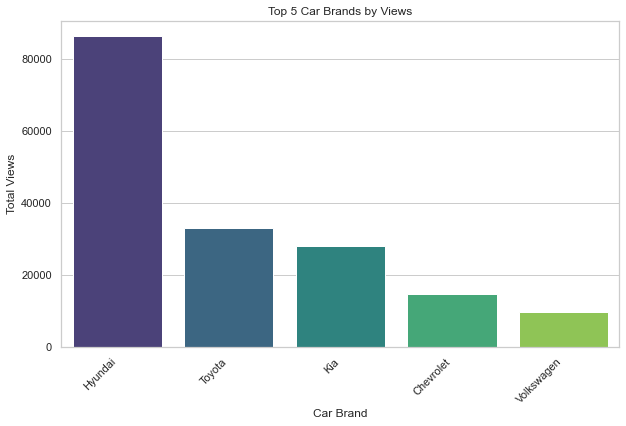

In [242]:
#Assistance to potential buyers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis", hue=top_brands.index, dodge=False, legend=False)
plt.title('Top 5 Car Brands by Views')
plt.xlabel('Car Brand')
plt.ylabel('Total Views')
plt.xticks(rotation=45, ha='right')
plt.savefig('Top_5.png')

plt.show()

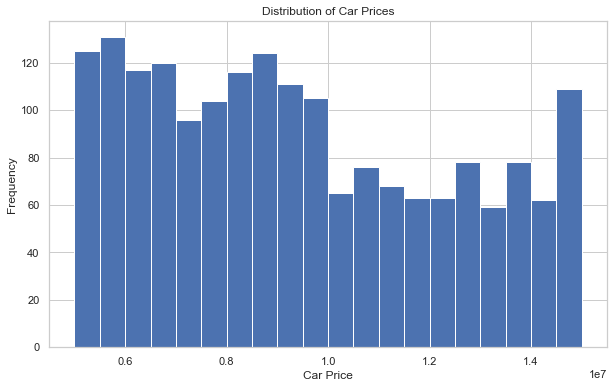

In [243]:
#Saving time and resources
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=20, title='Distribution of Car Prices')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.savefig('Car_Price.png')

plt.show()

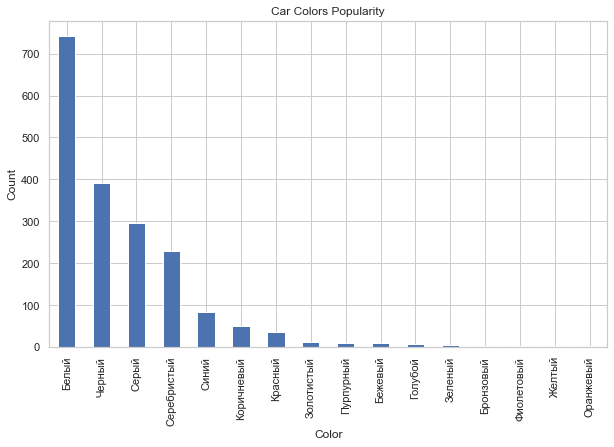

In [244]:
plt.figure(figsize=(10, 6))
colors_count.plot(kind='bar', title='Car Colors Popularity')
plt.xlabel('Color')
plt.ylabel('Count')
plt.savefig('Car_Colors.png')

plt.show()

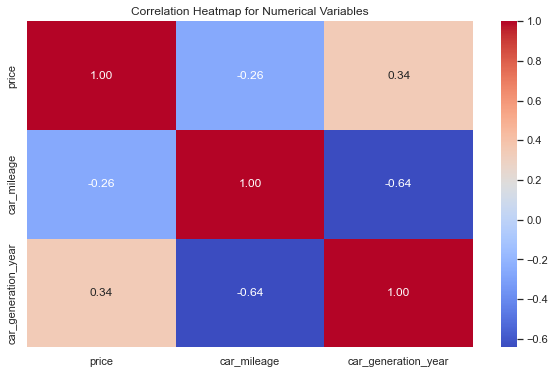

In [245]:
#такие как цена, пробег и год выпуска, есть ли какие то явные взаимосвязи между этими переменными.
numerical_columns = ['price', 'car_mileage', 'car_generation_year']
numerical_corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.savefig('Correlation.png')

plt.show()

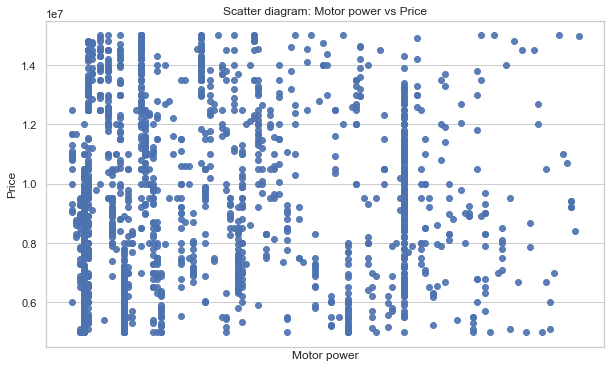

In [246]:
plt.figure(figsize=(10, 6))
plt.scatter(df['engine_power'], df['price'], alpha=0.9)
plt.title('Scatter diagram: Motor power vs Price')
plt.xlabel('Motor power')
plt.ylabel('Price')
plt.xticks([])
plt.savefig('Motor_Price.png')

plt.show()

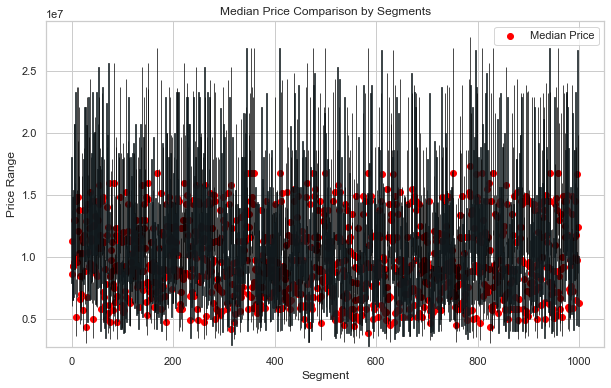

In [306]:
df_subset = df.head(1000)
segments_df = pd.json_normalize(df_subset['price_analytics'])
segments_df['segment_ranges'] = segments_df['segment_ranges'].apply(lambda x: x[0])
segments_df[['range_min', 'range_max']] = pd.json_normalize(segments_df['segment_ranges'])
segments_df[['range_min', 'range_max']] = segments_df[['range_min', 'range_max']].apply(pd.to_numeric)
median_prices = segments_df['median_price'].astype(float)
plt.figure(figsize=(10, 6))
plt.scatter(segments_df.index, median_prices, label='Median Price', color='red')
plt.bar(segments_df.index, segments_df['range_max'], bottom=segments_df['range_min'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Median Price Comparison by Segments')
plt.xlabel('Segment')
plt.ylabel('Price Range')
plt.legend()
plt.savefig('Price_Segment.png')

plt.show()

In [67]:
json_file_path = "CARS_INFO.json"
with open(json_file_path, 'w') as json_file:
    json.dump(CARS_INFO, json_file, indent=2)

print(f"Данные сохранены в {json_file_path}")

Данные сохранены в CARS_INFO.json
